### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'

In [4]:
df = pd.read_csv('2008.csv') 
df.head(10)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,1955,2211,2225,WN,335,...,4,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754,735,1002,1000,WN,3231,...,5,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628,620,804,750,WN,448,...,3,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926,930,1054,1100,WN,1746,...,3,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829,1755,1959,1925,WN,3920,...,3,10,0,NaN,0,2,0,0,0,32
5,2008,1,3,4,1940,1915,2121,2110,WN,378,...,4,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937,1830,2037,1940,WN,509,...,3,7,0,NaN,0,10,0,0,0,47
7,2008,1,3,4,1039,1040,1132,1150,WN,535,...,7,7,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617,615,652,650,WN,11,...,6,19,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620,1620,1639,1655,WN,810,...,3,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [2]:
df.keys()

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [2]:
x = df['UniqueCarrier'].value_counts()[0:10]
a=x.index.tolist()
b = ' '.join(a)
print('топ-10 массовых перевозчиков: ', b)

топ-10 массовых перевозчиков:  WN AA OO MQ US DL UA XE NW CO


**Задание 2:** Построить распределение причин отмены рейсов

In [65]:
k = df['CancellationCode'].value_counts()
k.index=['Weather','Carrier','National Air System', 'Security']
k

Weather                54904
Carrier                54330
National Air System    28188
Security                  12
Name: CancellationCode, dtype: int64

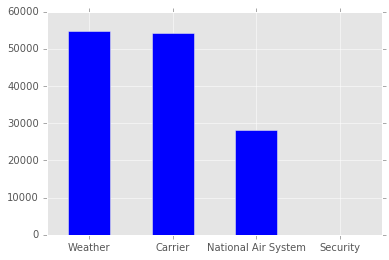

In [66]:
k.plot(kind='bar', rot=0, legend=False)

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [3]:
s = pd.DataFrame(df['Origin']+df['Dest'], columns=['route']) 
popular = s['route'].value_counts().idxmax()
print('Самый популярный маршрут: ', popular[:3] + '-' + popular[3:])

Самый популярный маршрут:  SFO-LAX


In [70]:
data = df.loc[df['Origin']+df['Dest'] == popular]
data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,13788,13788.000000,13788.000000,13788.000000,13299.000000,13788.000000,13286.000000,13788.000000,13788.000000,13285.000000,...,13788,13286.000000,13299.000000,13788.000000,13788.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2008,6.337322,15.730418,3.862997,1371.032408,1356.596388,1481.378820,1493.550116,1862.825573,82.417840,...,337,9.912163,17.273554,0.035466,0.001015,9.689688,0.360280,7.630808,0.026416,42.157225
std,0,3.358147,8.791381,1.973866,489.328348,472.940974,502.009856,473.465680,1999.167552,10.184247,...,0,5.120369,7.126813,0.184960,0.031850,27.959199,8.216006,16.685259,1.009160,46.774688
min,2008,1.000000,1.000000,1.000000,3.000000,540.000000,1.000000,5.000000,4.000000,58.000000,...,337,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,3.000000,8.000000,2.000000,941.000000,945.000000,1054.000000,1110.000000,817.000000,75.000000,...,337,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2008,6.000000,16.000000,4.000000,1355.000000,1315.000000,1507.000000,1443.000000,1153.000000,81.000000,...,337,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000
75%,2008,9.000000,23.000000,5.000000,1809.000000,1756.000000,1919.000000,1920.000000,1957.000000,88.000000,...,337,12.000000,20.000000,0.000000,0.000000,7.000000,0.000000,11.000000,0.000000,64.000000
max,2008,12.000000,31.000000,7.000000,2400.000000,2240.000000,2400.000000,2359.000000,7815.000000,196.000000,...,337,106.000000,84.000000,1.000000,1.000000,339.000000,406.000000,401.000000,54.000000,373.000000


**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

Учитывая неоднозначность задания, я интерпретировал его следующим образом: для каждого Delay я находил не просто рейс, а рейс+авиакомпания, так как разые авиакомпании могут выполять рейс под одним и тем же номером, я решил, что более осмысленно выводить именно конкретные рейсы авиакомпаний, так как это дает понимание, насколько конкретный перевозчик задерживает конкретный рейс, а не абстрактную сумму задержек данного номера рейса по всем авиакомпаниям. 

In [8]:
#Выбираем  данные, где есть показатели по CarrierDelay
Delay = df[df['CarrierDelay'] > 0][['FlightNum', 'UniqueCarrier']]

#Группируем и считаем количесвто вхождений уникальной комбинации FlightNum + UniqueCarrier, записываем кол-во в Times
zzz = Delay.groupby(['FlightNum', 'UniqueCarrier']).size().reset_index(name='Times')

#Сортируем по убыванию
p = zzz.sort_values(by='Times', ascending=False)

#Выводим первые 5 рейсов с авиакомпанией
print('топ-5 рейсов по CarrierDelay:')
for index, row in p[:5].iterrows():
    print('Рейс ' + str(row['FlightNum']) + ' перевозчик ' + row['UniqueCarrier'])
print('\n')

#Выбираем  данные, где есть показатели по WeatherDelay
Delay = df[df['WeatherDelay'] > 0][['FlightNum', 'UniqueCarrier']]

#Группируем и считаем количесвто вхождений уникальной комбинации FlightNum + UniqueCarrier, записываем кол-во в Times
zzz = Delay.groupby(['FlightNum', 'UniqueCarrier']).size().reset_index(name='Times')

#Сортируем по убыванию
p = zzz.sort_values(by='Times', ascending=False)

#Выводим первые 5 рейсов с авиакомпанией
print('топ-5 рейсов по WeatherDelay:')
for index, row in p[:5].iterrows():
    print('Рейс ' + str(row['FlightNum']) + ' перевозчик ' + row['UniqueCarrier'])
print('\n')

#Выбираем  данные, где есть показатели по NASDelay
Delay = df[df['NASDelay'] > 0][['FlightNum', 'UniqueCarrier']]

#Группируем и считаем количесвто вхождений уникальной комбинации FlightNum + UniqueCarrier, записываем кол-во в Times
zzz = Delay.groupby(['FlightNum', 'UniqueCarrier']).size().reset_index(name='Times')

#Сортируем по убыванию
p = zzz.sort_values(by='Times', ascending=False)

#Выводим первые 5 рейсов с авиакомпанией
print('топ-5 рейсов по NASDelay:')
for index, row in p[:5].iterrows():
    print('Рейс ' + str(row['FlightNum']) + ' перевозчик ' + row['UniqueCarrier'])
print('\n')

#Выбираем  данные, где есть показатели по SecurityDelay
Delay = df[df['SecurityDelay'] > 0][['FlightNum', 'UniqueCarrier']]

#Группируем и считаем количесвто вхождений уникальной комбинации FlightNum + UniqueCarrier, записываем кол-во в Times
zzz = Delay.groupby(['FlightNum', 'UniqueCarrier']).size().reset_index(name='Times')

#Сортируем по убыванию
p = zzz.sort_values(by='Times', ascending=False)

#Выводим первые 5 рейсов с авиакомпанией
print('топ-5 рейсов по SecurityDelay:')
for index, row in p[:5].iterrows():
    print('Рейс ' + str(row['FlightNum']) + ' перевозчик ' + row['UniqueCarrier'])
print('\n')

#Выбираем  данные, где есть показатели по LateAircraftDelay
Delay = df[df['LateAircraftDelay'] > 0][['FlightNum', 'UniqueCarrier']]

#Группируем и считаем количесвто вхождений уникальной комбинации FlightNum + UniqueCarrier, записываем кол-во в Times
zzz = Delay.groupby(['FlightNum', 'UniqueCarrier']).size().reset_index(name='Times')

#Сортируем по убыванию
p = zzz.sort_values(by='Times', ascending=False)

#Выводим первые 5 рейсов с авиакомпанией
print('топ-5 рейсов по LateAircraftDelay:')
for index, row in p[:5].iterrows():
    print('Рейс ' + str(row['FlightNum']) + ' перевозчик ' + row['UniqueCarrier'])

топ-5 рейсов по CarrierDelay:
Рейс 50 перевозчик WN
Рейс 24 перевозчик WN
Рейс 46 перевозчик WN
Рейс 54 перевозчик WN
Рейс 40 перевозчик WN


топ-5 рейсов по WeatherDelay:
Рейс 539 перевозчик CO
Рейс 5685 перевозчик OH
Рейс 648 перевозчик NW
Рейс 449 перевозчик CO
Рейс 5257 перевозчик OH


топ-5 рейсов по NASDelay:
Рейс 350 перевозчик AA
Рейс 1555 перевозчик AA
Рейс 1763 перевозчик AA
Рейс 1069 перевозчик B6
Рейс 67 перевозчик AS


топ-5 рейсов по SecurityDelay:
Рейс 52 перевозчик AS
Рейс 55 перевозчик AS
Рейс 47 перевозчик CO
Рейс 167 перевозчик AS
Рейс 2877 перевозчик YV


топ-5 рейсов по LateAircraftDelay:
Рейс 50 перевозчик WN
Рейс 44 перевозчик WN
Рейс 40 перевозчик WN
Рейс 24 перевозчик WN
Рейс 46 перевозчик WN


**Задание 5:** Определить, как распределено количество рейсов от времени дня?

In [7]:
morning = df[(df['DepTime'] > 500) & (df['DepTime'] < 1200)]['DepTime'].count()
day = df[(df['DepTime'] >= 1200) & (df['DepTime'] < 1900)]['DepTime'].count()
evening = df[(df['DepTime'] >= 1900) & (df['DepTime'] <= 2400)]['DepTime'].count()
night = df[(df['DepTime'] > 0) & (df['DepTime'] <= 500)]['DepTime'].count()

s = pd.Series([morning,day,evening,night], index=['Morning', 'Day', 'Evening', 'Night'])
s



Morning    2791436
Day        2955456
Evening    1094404
Night        32186
dtype: int64

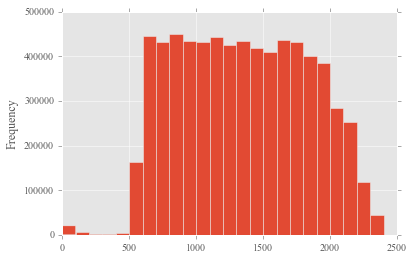

In [5]:
df['DepTime'].plot(kind='hist', bins=24) 

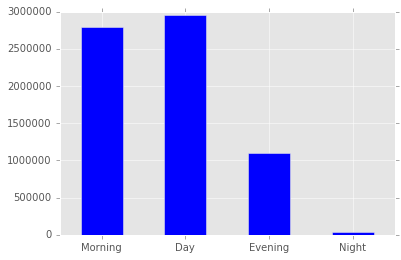

In [52]:
s.plot(kind='bar', rot=0)

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

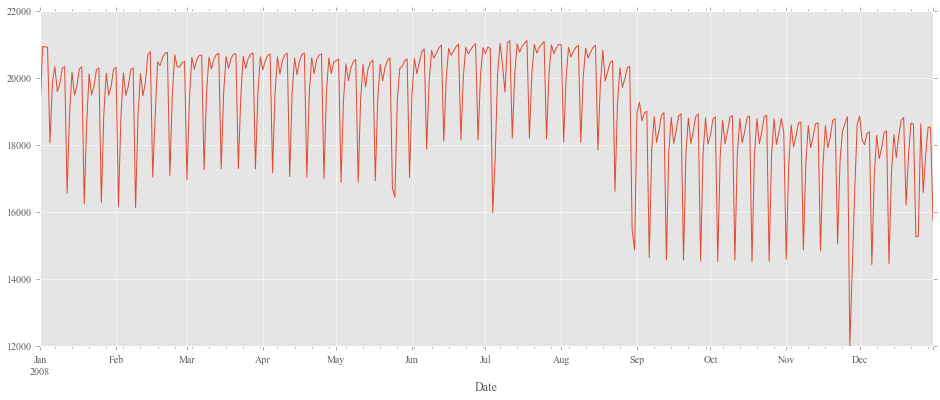

In [19]:
df['Date'] = pd.to_datetime(df.Year*10000 + df.Month*100 + df.DayofMonth, format='%Y%m%d')
season = df.groupby('Date').size()
season.plot(figsize=(16, 6))

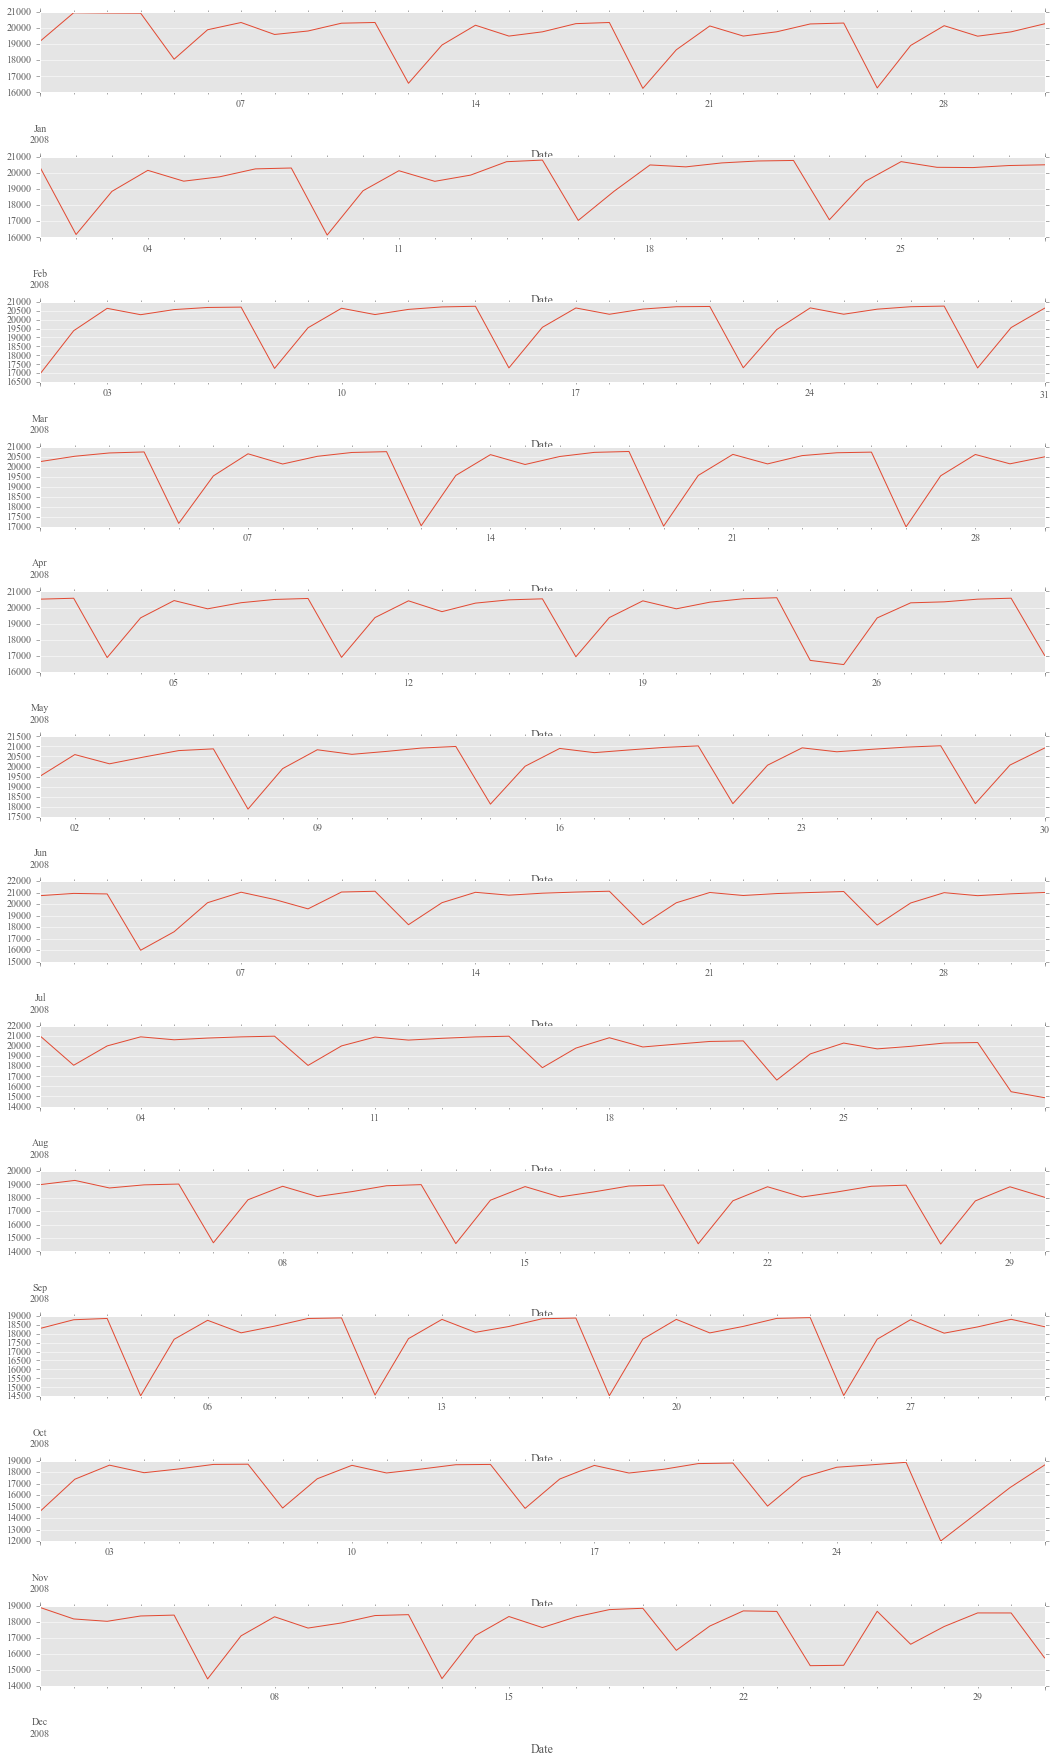

In [38]:
f, a = plt.subplots(12,1,  figsize=(18, 30))
f.subplots_adjust(hspace=.8)
season['2008-1'].plot(ax=a[0])
season['2008-2'].plot(ax=a[1])
season['2008-3'].plot(ax=a[2])
season['2008-4'].plot(ax=a[3])
season['2008-5'].plot(ax=a[4])
season['2008-6'].plot(ax=a[5])
season['2008-7'].plot(ax=a[6])
season['2008-8'].plot(ax=a[7])
season['2008-9'].plot(ax=a[8])
season['2008-10'].plot(ax=a[9])
season['2008-11'].plot(ax=a[10])
season['2008-12'].plot(ax=a[11])


### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [33]:
df1 = pd.read_csv('table13.csv') 
df2 = pd.read_csv('table14.csv') 


In [46]:
df1.head(5)

,State,Agency Type,Agency Name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,Q1,Q2,Q3,Q4,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"
2,Alabama,Cities,Prattville,2,0,0,0,0,0,0,1,0,1,0,"35,154"
3,Alabama,Cities,Tuscaloosa,1,0,0,0,0,0,0,0,0,1,0,"94,126"
4,Alaska,Cities,Anchorage,8,0,0,0,0,0,0,2,3,3,0,"299,455"


In [35]:
states1 = pd.Series(df1['State'].unique())
states2 = pd.Series(df2['State'].unique())
print('Количество одинаковых штатов =', states1.isin(states2).value_counts()[1])

Количество одинаковых штатов = 48


In [47]:
df2.head(5)

,State,Agency Type,Agency Name,Q1,Q2,Q3,Q4,Population
0,Alabama,Cities,Ashford,0,0,0,0,"2,177"
1,Alabama,Cities,Ashland,0,0,0,0,"1,926"
2,Alabama,Cities,Auburn,0,0,0,0,"57,970"
3,Alabama,Cities,Berry,NaN,0,NaN,NaN,"1,124"
4,Alabama,Cities,Childersburg,0,0,0,0,"5,111"


**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [39]:
result = df1.append(df2)
result.head(5)

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,0,1,0,1,NaN,NaN,Florence,Cities,0,0,...,0,"39,481",NaN,NaN,NaN,NaN,2,0,0,Alabama
1,0,1,0,0,NaN,NaN,Hoover,Cities,0,0,...,0,"84,139",NaN,NaN,NaN,NaN,0,0,1,Alabama
2,1,0,1,0,NaN,NaN,Prattville,Cities,0,0,...,0,"35,154",NaN,NaN,NaN,NaN,2,0,0,Alabama
3,0,0,1,0,NaN,NaN,Tuscaloosa,Cities,0,0,...,0,"94,126",NaN,NaN,NaN,NaN,1,0,0,Alabama
4,2,3,3,0,NaN,NaN,Anchorage,Cities,0,0,...,0,"299,455",NaN,NaN,NaN,NaN,8,0,0,Alaska


**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [38]:
result.dropna() 

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State


Очистилась вся таблица, так как там слишком много NAN

In [40]:
df1.rename(columns={'Agency type':'Agency Type', 'Agency name':'Agency Name', '1st quarter':'Q1','2nd quarter':'Q2','3rd quarter':'Q3','4th quarter':'Q4'}, inplace=True)

In [41]:
result = df1.append(df2)
result.head(5)

,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1,Alabama
2,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0,Alabama
3,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0,Alabama
4,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0,Alaska


In [42]:
result = result.dropna() 
result.head(5)

,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1,Alabama
2,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0,Alabama
3,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0,Alabama
4,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0,Alaska


**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [43]:
table=result.set_index(['State', 'Agency Type'])
table.head(5)

Agency Name  Disability  Ethnicity Gender  \
State   Agency Type                                             
Alabama Cities         Florence           0          0      0   
        Cities           Hoover           0          0      0   
        Cities       Prattville           0          0      0   
        Cities       Tuscaloosa           0          0      0   
Alaska  Cities        Anchorage           0          0      0   

                     Gender Identity Population  Q1  Q2  Q3  Q4  Race  \
State   Agency Type                                                     
Alabama Cities                     0     39,481   0   1   0   1     2   
        Cities                     0     84,139   0   1   0   0     0   
        Cities                     0     35,154   1   0   1   0     2   
        Cities                     0     94,126   0   0   1   0     1   
Alaska  Cities                     0    299,455   2   3   3   0     8   

                     Religion  Sexual orientation  
State   Agency Type                                
Alabama Cities              0                   0  
        Cities              0                   1  
        Cities              0                   0  
        Cities              0                   0  
Alaska  Cities              0                   0

**Задание 5:** В Pandas можно идерировать по DataFrame! Ищучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [44]:
three_states=table.loc['California':'Connecticut'].reset_index()
three_states.head(5)

,State,Agency Type,Agency Name,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation
0,California,Cities,Adelanto,0,1,0,0,"31,165",1,0,1,0,1,0,0
1,California,Cities,Agoura Hills,0,0,0,0,"20,762",0,2,0,0,2,0,0
2,California,Cities,Alameda,0,0,0,0,"76,206",0,0,0,1,0,1,0
3,California,Cities,Alhambra,0,0,0,0,"84,710",0,0,0,1,1,0,0
4,California,Cities,Antioch,0,0,0,0,"106,447",1,1,0,0,2,0,0


In [45]:
three_states['Population'] = pd.to_numeric(three_states['Population'].str.replace(',', ''))
three_states.head(5)

,State,Agency Type,Agency Name,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation
0,California,Cities,Adelanto,0,1,0,0,31165,1,0,1,0,1,0,0
1,California,Cities,Agoura Hills,0,0,0,0,20762,0,2,0,0,2,0,0
2,California,Cities,Alameda,0,0,0,0,76206,0,0,0,1,0,1,0
3,California,Cities,Alhambra,0,0,0,0,84710,0,0,0,1,1,0,0
4,California,Cities,Antioch,0,0,0,0,106447,1,1,0,0,2,0,0


In [231]:
pd.DataFrame(three_states.groupby(['State','Agency Type'])['Population'].sum())

Population
State       Agency Type                          
California  Cities                       23408127
            Universities and Colleges      309287
Colorado    Cities                        2812382
            Universities and Colleges       62604
Connecticut Cities                        1427760
            Universities and Colleges       23208

## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
df3 = pd.read_csv('accord_sedan_training.csv') 
df3.head(5)

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual
2,11999,80313,2006,lx,4 Cyl,Automatic
3,12995,86096,2006,lx,4 Cyl,Automatic
4,11333,79607,2006,lx,4 Cyl,Automatic


In [51]:
x = df3['mileage'].values
y= df3['price'].values
z = np.ones(shape=(x.size, 2)) 
z[:, 1] = x
x=z

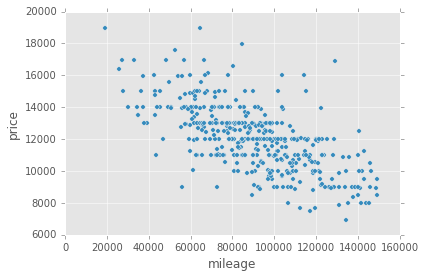

In [52]:
df3.plot(kind='scatter', x='mileage', y='price')

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

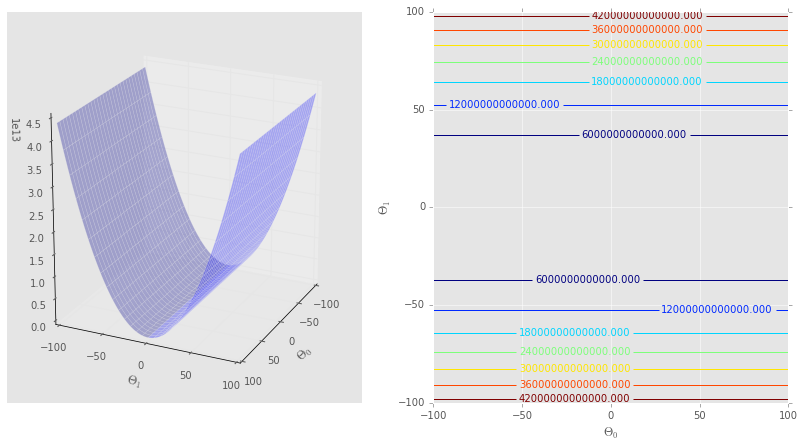

In [53]:
from mpl_toolkits import mplot3d


theta0 = np.linspace(-100, 100, 300)
theta1 = np.linspace(-100, 100, 300)

T0, T1  = np.meshgrid(theta0,theta1)
F=0
for i in range(len(y)):
    F += (T0 + T1*x[i][1] - y[i])**2
L = (1/(2*len(y)))*F

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(20, 25)
ax.plot_surface(T0, T1, L, alpha=0.3)
ax.set_xlabel('$\Theta_0$')
ax.set_ylabel('$\Theta_1$')

ax = fig.add_subplot(1, 2, 2) 
contour = ax.contour(T0, T1, L) 
plt.clabel(contour, inline =1, fontsize = 10)
ax.set_xlabel('$\Theta_0$')
ax.set_ylabel('$\Theta_1$')

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [54]:
def compute_cost(X, y, theta):
    m = y.size
    predictions = X.dot(theta).flatten()
    sqErrors = (predictions - y) ** 2
    J = (1.0 / (2 * m)) * sqErrors.sum()
    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    
    m = y.size
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta).flatten()

        errors_x1 = (predictions - y)
        errors_x2 = (predictions - y) * X[:, 1]
    
        
        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()
        

        J_history[i, 0] = compute_cost(X, y, theta)
        print("iter %s | J: %.3f" % (i, J_history[i, 0]))

        #print('alpha-0', alpha)
        
        # пусть альфа изменяется в процессе
        if i>0:
            if J_history[i, 0]-J_history[i-1, 0]<0:
                alpha=alpha*1.01
            elif J_history[i, 0]-J_history[i-1, 0]>0:
                alpha=alpha/2
        #print('alpha-1', alpha)    
        
    return theta, J_history



theta = np.ones(shape=(2, 1))

iterations = 1500
alpha = 0.0000001

print('Costs=', compute_cost(x, y, theta))

theta, J_history = gradient_descent(x, y, theta, alpha, iterations)


Costs= 3387443450.51
iter 0 | J: 2562438414217979.000
iter 1 | J: 1945270346600759164928.000
iter 2 | J: 368340129271260056444207104.000
iter 3 | J: 17356403139846310788539206336512.000
iter 4 | J: 202581514282555354046897488666820608.000
iter 5 | J: 580233346151621919536614208319824855040.000
iter 6 | J: 400094176952471859423108112681226333061120.000
iter 7 | J: 63817215515545205789555483073148491243978752.000
iter 8 | J: 2157761977443385763573181236414390445723877376.000
iter 9 | J: 12505335975726442063603670172538171879321501696.000
iter 10 | J: 6192449219697175407664900667042109706272243712.000
iter 11 | J: 3216682439182807147325934502670687976076345344.000
iter 12 | J: 1751651242335802084753670372653463463958413312.000
iter 13 | J: 999323970907173717778025549879430953551527936.000
iter 14 | J: 596924684452167423348733573876533358061682688.000
iter 15 | J: 373105851118882947728961258840569750417833984.000
iter 16 | J: 243891951671307590259824397586073402426261504.000
iter 17 | J: 1

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [55]:
print(theta)

[[ 1.00558341]
 [ 0.12027332]]


Интерпретируются как наклон линии и точка ее пересечения с oY

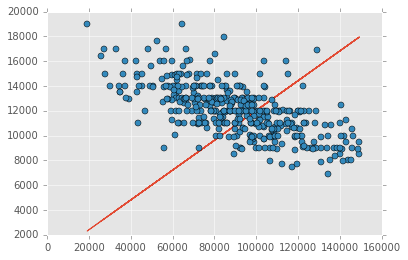

In [58]:
result = x.dot(theta).flatten()
plt.plot(x[:,1], result)
plt.plot(x[:,1],y,'o')
plt.show()

Очевидно, что-то пошло не так, но я не знаю, как его настроить, чтобы пошло так. Вот так вот :(